<a href="https://colab.research.google.com/github/tarabelo/2024-VIU-Quantum/blob/main/Bits%20y%20C%C3%BAbits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# Instalamos qiskit en el notebook
!pip install qiskit qiskit-aer pylatexenc

In [ ]:
import qiskit
import qiskit_aer
print('Qiskit version ',qiskit.__version__)
print('Aer simulator version ', qiskit_aer.__version__)

Qiskit version  1.1.0
Aer simulator version  0.14.2


#**Bits y Cúbits**

Contenidos

1. [Bits clásicos como vectores](#bits)
2. [Bits cuánticos o cúbits](#cubits)
3. [Medida del estado](#medida)
4. [Aspectos adicionales](#otros)

<a name="bits"></a>
# **Bits clásicos como vectores**

Podemos expresar 1 bit clásico como un vector de tamaño 2:

 $$
|b\rangle = \begin{bmatrix}p_0 \\p_1 \end{bmatrix}
$$

con $p_i \in \{0,1\}$ y $p_0+p_1 = 1$.

Así:

$$
|0\rangle = \begin{bmatrix}1 \\0 \end{bmatrix}\qquad |1\rangle = \begin{bmatrix}0 \\1 \end{bmatrix}
$$

## Notación de Dirac

Ket: $|\,\rangle$

Bra: $\langle\,|$

$$
|v\rangle =
\begin{bmatrix}
v_0 \\ v_1\\ \vdots \\v_{n-1}
\end{bmatrix}
$$

con $v_i\in \mathbb{C}$.


$$
\langle v| = (|v\rangle)^\dagger =
\begin{bmatrix}
v_0^* & v_1^* & \cdots & v_{n-1}^*
\end{bmatrix}
$$

donde el símbolo $\dagger$ representa la matriz traspuesta conjugada

### Operaciones

Sean $|u\rangle$ y $|v\rangle$ vectores de dimensión n



#### Producto escalar o interno
$$
\langle v|u\rangle =
\begin{bmatrix}
v_0^* & v_1^* & \cdots & v_{n-1}^*
\end{bmatrix}\cdot
\begin{bmatrix}
u_0 \\ u_1\\ \vdots \\u_{n-1}
\end{bmatrix} =
v_0^*u_0 + v_1^*u_1 + \cdots + v_{n-1}^*u_{n-1} \in \mathbb{C}
$$

El módulo (o norma) del vector es:

$$
\lVert|v\rangle\|^2 = \langle v|v\rangle = v_0^*v_0 + v_1^*v_1 + \cdots + v_{n-1}^*v_{n-1} =
|v_0|^2 + |v_1|^2 + \cdots + |v_{n-1}|^2 \in \mathbb{R}
$$

Esta norma es siempre positiva, $\||v\rangle\|\ge 0$, y $\||v\rangle\|= 0\Leftrightarrow |v\rangle = 0$

**Propiedades del producto interno:**

Linealidad por la izquierda:
- $\langle (\alpha v+\beta w)|u\rangle = \alpha\langle v|u\rangle+\beta\langle w|u\rangle$ con $\alpha,\beta \in \mathbb{C}$

Linealidad conjugada por la derecha:
- $\langle v|(\alpha u+\beta w)\rangle = \alpha^*\langle v|u\rangle+\beta^*\langle v|w\rangle$ con $\alpha,\beta \in \mathbb{C}$

Hermiticidad:
- $\langle v|u\rangle = (\langle u|v\rangle)^*$


#### Producto externo (*outer product*)
El producto externo de dos vectores de dimensión $n$ es una matriz de dimensión $n\times n$

$$
|u\rangle\langle v| =
\begin{bmatrix}
u_0 \\ u_1\\ \vdots \\u_{n-1}
\end{bmatrix}\cdot
\begin{bmatrix}
v_0^* & v_1^* & \cdots & v_{n-1}^*
\end{bmatrix}
 =
\begin{bmatrix}
u_0v_0^* & u_0v_1^* & \cdots & u_0v_{n-1}^*\\
u_1v_0^* & u_1v_1^* & \cdots & u_1v_{n-1}^*\\
\vdots & \vdots & \ddots & \vdots\\
u_{n-1}v_0^* & u_{n-1}v_1^* & \cdots & u_{n-1}v_{n-1}^*\\
\end{bmatrix}
$$

**Propiedades del producto externo:**

- $|u\rangle\langle v| = (|v\rangle\langle u|)^\dagger$
<p>
- $(|u\rangle + |v\rangle)(\langle w|+\langle x|) = |u\rangle(\langle w|+\langle x|)+|v\rangle(\langle w|+\langle x|) = |u\rangle\langle w|+|u\rangle\langle x|+|v\rangle\langle w|+|v\rangle\langle x|$
<p>
- $\alpha(|u\rangle\langle v|) =  (\alpha|u\rangle)\langle v| = |u\rangle(\alpha\langle v|)$ con $\alpha\in \mathbb{C}$
<p>
- $(|u\rangle\langle v|)|w\rangle = |u\rangle(\langle v|w\rangle) = (\langle v|w\rangle)|u\rangle$ ya que $\langle v|w\rangle$ es un escalar.

#### Producto tensor (o Kronecker)

 El producto tensor de un vector $|u\rangle$ de m elementos y un vector $|v\rangle$ de n elementos es un vector de $m\cdot n$ elementos dado por:
 $$
 |u\rangle\otimes|v\rangle \equiv |u\rangle|v\rangle \equiv |uv\rangle =
  \begin{bmatrix}
u_0
\begin{bmatrix}
v_0 \\ v_1\\ \vdots \\v_{n-1}
\end{bmatrix}\\
u_1
\begin{bmatrix}
v_0 \\ v_1\\ \vdots \\v_{n-1}
\end{bmatrix}\\
\vdots\\
u_{m-1}
\begin{bmatrix}
v_0 \\ v_1\\ \vdots \\v_{n-1}
\end{bmatrix}
\end{bmatrix} =
 \begin{bmatrix}
u_0v_0\\
u_0v_1\\
\vdots\\
u_0v_{n-1}\\
u_1v_0\\
u_1v_1\\
\vdots\\
u_1v_{n-1}\\
\vdots\\
u_{m-1}v_0\\
u_{m-1}v_1\\
\vdots\\
u_{m-1}v_{n-1}\\
\end{bmatrix}
$$

**Propiedades del producto tensor:**

Asociatividad y traspuesta:

- $|u\rangle\otimes (|v\rangle+|w\rangle) = |u\rangle\otimes |v\rangle+|u\rangle\otimes |w\rangle$
- $(|v\rangle+|w\rangle)\otimes |u\rangle = |v\rangle\otimes |u\rangle+|w\rangle\otimes |u\rangle$
- $(|u\rangle\otimes |v\rangle)\otimes |w\rangle = |u\rangle\otimes (|v\rangle \otimes |w\rangle)$
- $(|u\rangle\otimes |v\rangle)^\dagger = |u\rangle^\dagger \otimes |v\rangle^\dagger$
- $(\alpha|u\rangle)\otimes |v\rangle = |u\rangle\otimes (\alpha|v\rangle) = \alpha(|u\rangle\otimes |v\rangle)$, con $\alpha\in \mathbb{C}$

No-conmutatividad (en general):

- $|u\rangle \otimes |v\rangle \neq |v\rangle\otimes |u\rangle$

Propiedad del producto mixto:

- $\langle uv|wx\rangle = \langle u\otimes v|w\otimes x\rangle = \langle u|w\rangle\langle v|x\rangle$
- $|uv\rangle\langle wx| = (|u\rangle\otimes |v\rangle)(\langle w|\otimes \langle x|) = |u\rangle \langle w|\otimes |v\rangle\langle x|$

Esta última expresión es un producto tensor de matrices.


## Múltiples bits

Un número de 2 bits $|ab\rangle$, con $a,b\in\{0,1\}$ se puede expresar como el producto tensor de los bits individuales:

$$
|ab\rangle = |a\rangle\otimes |b\rangle = \begin{bmatrix}a_{0} \\ a_{1}\end{bmatrix}\otimes \begin{bmatrix}b_{0} \\ b_1\end{bmatrix} = \begin{bmatrix} a_{0}b_0\\ a_0b_1 \\ a_1b_0 \\ a_1b_1\end{bmatrix} = \begin{bmatrix} p_{0}\\ p_1 \\ p_2 \\ p_{3}\end{bmatrix}
$$

con $p_i \in \{0,1\}$. Es fácil verificar que se sigue manteniendo: $p_0+p_1+p_2+p_3 = 1$.

----------------------------

**Ejemplo:**


$$
|00\rangle = |0\rangle\otimes |0\rangle = \begin{bmatrix}1 \\ 0\end{bmatrix}\otimes \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}1 \\ 0 \\ 0 \\ 0\end{bmatrix}\\
|01\rangle = |0\rangle\otimes |1\rangle  = \begin{bmatrix}1 \\ 0\end{bmatrix}\otimes \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 1 \\ 0 \\ 0\end{bmatrix}\\
|10\rangle = |1\rangle\otimes |0\rangle  = \begin{bmatrix}0 \\ 1\end{bmatrix}\otimes \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}0 \\ 0 \\ 1 \\ 0\end{bmatrix}\\
|11\rangle = |1\rangle\otimes |1\rangle = \begin{bmatrix}0 \\ 1\end{bmatrix}\otimes \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 0 \\ 0 \\ 1\end{bmatrix}\\
$$

----------------------------

Podemos escribir por tanto:

$$
|ab\rangle = \begin{bmatrix} p_{0}\\ p_1 \\ p_2 \\ p_{3}\end{bmatrix} = p_0|00\rangle + p_1|01\rangle + p_2 |10\rangle + p_3|11\rangle
$$

En general, vamos a poder escribir un número de $n$ bits como:
$$
|B\rangle = p_0|00\ldots00\rangle +p_1|00\ldots01\rangle + p_2|00\ldots10\rangle +\cdots + p_{2^n-1} |11\ldots11\rangle= \sum_{i=0}^{2^{n}-1}p_i |i\rangle
$$

con $p_i \in \{0,1\}$ y $\sum_{i=0}^{n-1}p_i = 1$, siendo $p_i$ la probabilidad de que el número sea $i$.



---



---



---



<a name="cubits"></a>
# **Bits cuánticos o cúbits**

## Vector de estado

Un cúbit puede verse como una generalización de un bit, representandose mediante un vector, denominado **vector de estado**:

$$
|\psi\rangle = \begin{bmatrix}a_0 \\a_1 \end{bmatrix}
$$

con $a_i \in \mathbb{C}$ y $|a_0|^2+|a_1|^2 = 1$.

$a_0$ y $a_1$ son [amplitudes de probabilidad](https://en.wikipedia.org/wiki/Probability_amplitude).

Los valores $|a_0|^2$ y $|a_1|^2$ representan la **probabilidad** de que al medir el cúbit obtengamos un 0 o un 1.

<details>
<summary>Resumen sobre números complejos</summary>

Números de la forma $a=a_r+ia_i$, con $i=\sqrt{-1}$ y:

- $a_r$ componente real, $a_r = \Re(a)$
- $a_i$ componente imaginaria, $a_i = \Im(a)$

con $a_r, a_i \in \mathbb{R}$

El conjunto de los números complejos se denota por $\mathbb{C}$. Resulta evidente que $\mathbb{R}\subset \mathbb{C}$.

**Operaciones con complejos**

Sean $a,b \in \mathbb{C}$, $a=a_r+ia_i$ $b=b_r+ib_i$

- Suma
$$
a+b = (a_r+b_r)+i(a_i+b_i) \in \mathbb{C}
$$

- Producto
Recordando que $i^2=-1$:
$$
a b = (a_r+ia_i)(b_r+ib_i)=(a_rb_r-a_ib_i)+i(a_rb_i+a_ib_r) \in \mathbb{C}
$$

- Conjugado
$$
a^* = a_r-ia_i  \in \mathbb{C}
$$

- Norma (o módulo)
$$
|a|^2 = a^*a = (a_r-ia_i)(a_r+ia_i) = a_r^2+ia_ra_i-ia_ia_r+a_i^2 = a_r^2 + a_i^2 \Rightarrow |a| = +\sqrt{a_r^2 + a_i^2} \in \mathbb{R}
$$

- División
$$
\frac{a}{b} = \frac{ab^*}{bb^*} = \frac{(a_r+ia_i)(b_r-ib_i)}{|b|^2} = \frac{(a_rb_r+a_ib_i)+i(a_ib_r-a_rb_i)}{|b|^2} \in \mathbb{C}
$$

**Forma polar**

[Formula de Euler](https://en.wikipedia.org/wiki/Euler%27s_formula): $e^{i\theta} = \cos\theta + i\sin\theta$ con $\theta\in \mathbb{R}$ denominada *fase*

<center><img src="https://drive.google.com/uc?export=view&id=1QCxOHx53EED6Unfc3DAynZwsESy0LJvs" alt="Complejo en forma polar" width="600"  /></center>

Notar también que $e^{i\theta} = e^{i(\theta+2k\pi)}$ con $k\in \mathbb{Z}$

*Ejemplos*

- $e^{i0} = \cos 0 + i\sin 0 = 1$
<p></p>
- $e^{i2\pi} = \cos(2\pi) + i\sin(2\pi) = 1$
<p></p>
- $e^{\pm i\pi} = \cos(\pm\pi) + i\sin(\pm\pi) = -1$
<p></p>
- $e^{i\pi/2} = \cos(\pi/2) + i\sin(\pi/2) = i$
<p></p>
- $e^{-i\pi/2} = \cos(-\pi/2) + i\sin(-\pi/2) = -i$
<p></p>
- $e^{i\pi/4} = \cos(\pi/4) + i\sin(\pi/4) = \tfrac{1}{\sqrt{2}}(1+i)$
<p></p>
- $e^{-i\pi/4} = \cos(-\pi/4) + i\sin(-\pi/4) = \tfrac{1}{\sqrt{2}}(1-i)$

**Operaciones en forma polar**

Sean $a,b \in \mathbb{C}$, $a=|a|e^{i\theta}$, $b=|b|e^{i\varphi}$, con $|a|, |b|, \theta, \varphi \in \mathbb{R}$.


- Producto
$$
a b = |a||b|e^{i(\theta+\varphi)} = |ab| (\cos(\theta+\varphi)+i\sin(\theta+\varphi))
$$

- Conjugado
$$
a^* = |a|e^{-i\theta} = |a| (\cos\theta - i\sin\theta)
$$

- División
$$
\frac{a}{b} = \frac{|a|}{|b|}e^{i(\theta-\varphi)} = \frac{|a|}{|b|}(\cos(\theta-\varphi)+i\sin(\theta-\varphi))
$$

- Potencia
$$
a^n = |a|^ne^{in\theta} = |a|^n (\cos(n\theta) - i\sin(n\theta))
$$

- Exponenciación
$$
e^{(x+yi)} = e^xe^{iy} = e^x(\cos(y)+i\sin(y))
$$

- Raíces
$$
\sqrt[n]{a} = a^\frac{1}{n} = |a|^\frac{1}{n}e^{i\frac{\theta+2k\pi}{n}}
$$
</details>



**Base canónica**

Como seguimos teniendo:

$$
|0\rangle = \begin{bmatrix}1 \\0 \end{bmatrix}\qquad |1\rangle = \begin{bmatrix}0 \\1 \end{bmatrix}
$$

podemos escribir:

$$
|\psi\rangle = a_0|0\rangle + a_1|1\rangle
$$

Matemáticamente, $|\psi\rangle$ es un vector unitario en un [espacio de Hilbert](https://en.wikipedia.org/wiki/Hilbert_space) de componentes complejas bidimensional denominado _espacio de estados_.

La base canónica de este espacio es $\{|0\rangle,|1\rangle\}$ (también llamada base estándar o base computacional).

----------------------------

**Ejemplos**

1. $|\psi\rangle=|0\rangle,\quad |\psi\rangle=|1\rangle$
<p></p>
2. $|\psi\rangle=|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle),\quad |\psi\rangle=|-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$
<p></p>
3. $|\psi\rangle=|\!\!\circlearrowleft\rangle \equiv |+i\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+e^{i\frac{\pi}{2}}|1\rangle) = \tfrac{1}{\sqrt{2}}(|0\rangle+i|1\rangle),\quad |\psi\rangle=|\!\!\circlearrowright\rangle =  |-i\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+e^{-i\frac{\pi}{2}}|1\rangle) = \tfrac{1}{\sqrt{2}}(|0\rangle-i|1\rangle)$

----------------------------

Tanto $\{|+\rangle, |-\rangle\}$ como $\{|\!\!+i\rangle, |\!\!-i\rangle\}$ son bases del espacio de Hilbert.

## Esfera de Bloch<a id="bloch"></a>

Si en el vector de estado anterior usamos la forma polar para $a_0$ y $a_1$:

$$
|\psi\rangle = |a_0|e^{i\varphi_0}|0\rangle + |a_1|e^{i\varphi_1}|1\rangle =
e^{i\varphi_0}\left[|a_0||0\rangle + |a_1|e^{i(\varphi_1-\varphi_0)}|1\rangle\right]
$$

El término $e^{i\varphi_0}$ es una fase global que no tiene significado físico y se puede eliminar.

Además, como $|a_0|^2+|a_1|^2 = 1$ existe un $\theta\in \mathbb{R}, 0\le\theta\le\pi$ tal que:

$$
|a_0| = \cos{\tfrac{\theta}{2}}\\
|a_1| = \sin{\tfrac{\theta}{2}}
$$

Si llamamos $\phi = \varphi_1-\varphi_0$ podemos escribir el cúbit como:

$$
|\psi\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$
con $\theta, \phi \in \mathbb{R}, 0\le\theta\le\pi, 0\le\phi\lt2\pi$

Si interpretamos $\theta$ y $\phi$ como [coordenadas esféricas](https://es.wikipedia.org/wiki/Coordenadas_esf%C3%A9ricas) de un vector de módulo $1$, podemos representar el vector de estado de un cúbit como un vector en la superficie de una esfera, conocida como _esfera de Bloch.


<center><img src="https://drive.google.com/uc?export=view&id=1x3wgeVRY8-KFC0g-deFSZFE7x-5M_jPP" alt="Esfera de Bloch" width="600"  /></center>

Las coordenadas cartesianas $(r_x,r_y,r_z)$ de un punto en la esfera de Bloch se obtienen mediante las ecuaciones de cambio de coordenadas (con $|\vec{r}|=1$):

$$
\vec{r} = \begin{pmatrix}
r_x\\r_y\\r_z
\end{pmatrix} =
\begin{pmatrix}
\sin\theta\cos\phi\\\sin\theta\sin\phi\\\cos\theta
\end{pmatrix}
$$
con $r_x,r_y, r_z\in[-1,1]$ y $|\vec{r}| = \sqrt{r_x^2+r_y^2+r_z^2}= 1$

### Estados sobre los ejes


1. $\theta = 0, \phi $ arbitrario $\Rightarrow$
$$|\psi\rangle = \cos(0)|0\rangle +e^{i\phi}\sin(0)|1\rangle = |0\rangle$$ $$\vec{r} = \begin{pmatrix}0\\0\\1\end{pmatrix}$$
<p></p>
1. $\theta = \pi, \phi $ arbitrario $ \Rightarrow$
$$|\psi\rangle = \cos\frac{\pi}{2}|0\rangle +e^{i\phi}\sin\frac{\pi}{2}|1\rangle = |1\rangle$$ $$\vec{r} = \begin{pmatrix}0\\0\\-1\end{pmatrix}$$
<p></p>
1. $\theta = \frac{\pi}{2}, \phi = 0 \Rightarrow $
$$|\psi\rangle = \cos\frac{\pi}{4}|0\rangle +e^{0}\sin\frac{\pi}{4}|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = |+\rangle$$ $$\vec{r} = \begin{pmatrix}1\\0\\0\end{pmatrix}$$
<p></p>
1. $\theta = \frac{\pi}{2}, \phi = \pi \Rightarrow $
$$|\psi\rangle = \cos\frac{\pi}{4}|0\rangle +e^{i\pi}\sin\frac{\pi}{4}|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = |-\rangle$$ $$\vec{r} = \begin{pmatrix}-1\\0\\0\end{pmatrix}$$
<p></p>
1. $\theta = \frac{\pi}{2}, \phi = \frac{\pi}{2} \Rightarrow $
$$|\psi\rangle = \cos\frac{\pi}{4}|0\rangle +e^{i\frac{\pi}{2}}\sin\frac{\pi}{4}|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+i|1\rangle) = |+i\rangle$$ $$\vec{r} = \begin{pmatrix}0\\1\\0\end{pmatrix}$$
<p></p>
1. $\theta = \frac{\pi}{2}, \phi = \frac{3\pi}{2} \Rightarrow $
$$|\psi\rangle = \cos\frac{\pi}{4}|0\rangle +e^{i\frac{3\pi}{2}}\sin\frac{\pi}{4}|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle-i|1\rangle) = |-i\rangle$$ $$\vec{r} = \begin{pmatrix}0\\-1\\0\end{pmatrix}$$

## Fase global y relativa<a id="fase"></a>

El término $e^{i\varphi_0}$ es una **fase global** sin significado físico, es decir, dos estados cuánticos que se diferencian en una fase global son idénticos:

$$
|\psi\rangle \equiv e^{i\phi}|\psi\rangle \quad \forall \phi \in \mathbb{R}
$$

El término $e^{i\phi}$ se denomina **fase relativa**, dos estados con diferente fase relativa son diferentes.

Ejemplo:

$$
|1\rangle \equiv e^{i\frac{\pi}{2}}|1\rangle = i|1\rangle
$$

$$
\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \neq \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\frac{\pi}{2}}|1\rangle) = \tfrac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)
$$

## Crear y visualizar un vector de estado en Qiskit<a id="qiskit"></a>

Qiskit proporciona el método [Statevector](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html) para crear y visualizar vectores de estado arbitrarios.

In [ ]:
from qiskit.quantum_info import Statevector
from math import sqrt

# Crear un estado cuántico en qiskit
𝜓 = Statevector([1/sqrt(2), 1j/sqrt(2)])

# Visualizamos el estado
display(𝜓.draw('latex', prefix="|\psi\\rangle = "))

<IPython.core.display.Latex object>

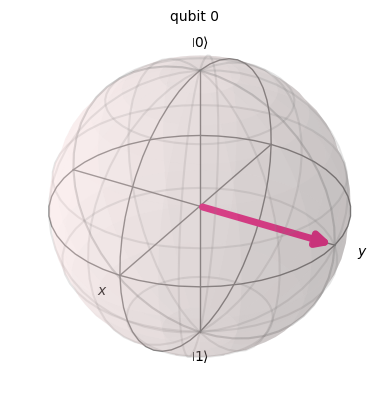

In [ ]:
# Visualización sobre la esfera de Bloch
𝜓.draw('bloch')

In [ ]:
# Definimos una función para visualizar el estado y la esfera a la vez
def muestra_estado(estado):
    display(estado.draw('latex', prefix="|\psi\\rangle = "))
    display(estado.draw('bloch'))

<IPython.core.display.Latex object>

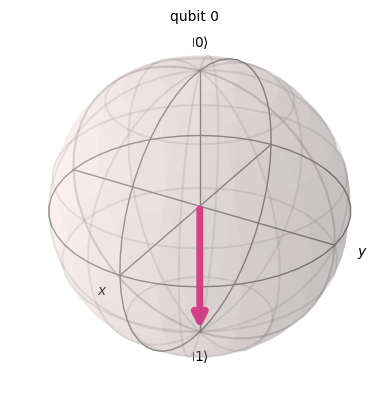

In [ ]:
# Ejemplo de vector de estado |1>
𝜓 = Statevector([0, 1])
muestra_estado(𝜓)

## Ejercicio: Vector de estado

a) Crea un estado con un 30% de probabilidad de medir un 0 y 70% de medir un 1 y muestra el vector de estado y la esfera de Bloch.

b) Obtén los valores de $\theta$ y $\phi$ para este estado.

In [ ]:
# Apartado a
a0 = ... # @param {type:"raw"}
a1 = ... # @param {type:"raw"}
estado30_70 = Statevector([a0,a1])
muestra_estado(estado30_70)

In [ ]:
# Apartado b
from math import acos,cos,sin,e,pi
theta = ... # @param {type:"raw"}
phi = ... # @param {type:"raw"}

# Para verificar que va bien,
# crea el estado a partir de los ángulos
# y comprueba que es el mismo de antes
estado2_30_70 = Statevector([cos(theta/2), e**(1j*phi)*sin(theta/2)])
muestra_estado(estado2_30_70)

In [ ]:
# Comprobamos el resultado calculando las probabilidades (probar a cambiar el valor de phi)
a0 = estado2_30_70.data[0]
a1 = estado2_30_70.data[1]
p0 = abs(a0)**2
p1 = abs(a1)**2
print(f"Probabilidad 0 = {p0}\nProbabilidad 1 = {p1}\n")

# Otra forma
p = estado2_30_70.probabilities()
print(f"Probabilidad 0 = {p[0]}\nProbabilidad 1 = {p[1]}")

## Circuitos de un cúbit en Qiskit

Qiskit permite crear circuitos con cúbits

- Los cúbits se inicializan al estado $|0\rangle$ por defecto
- Mediante puertas cuánticas modificamos el estado hasta obtener el que nos interesa
- Es posible inicializarlos a un estado arbitrario, que el *compilador* traduce a un conjunto de puertas cuánticas
- El circuito creado se puede simular o ejecutar en un sistema real

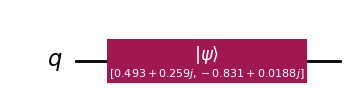

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, random_statevector

# Creamos un circuito cuántico de 1 cúbit
qc = QuantumCircuit(1)
# Inicializamos el cúbit al un estado aleatorio
qc.initialize(random_statevector(dims=2, seed=13)) # dims: dimensión del estado
# Mostramos el circuito
qc.draw(output='mpl')

<IPython.core.display.Latex object>

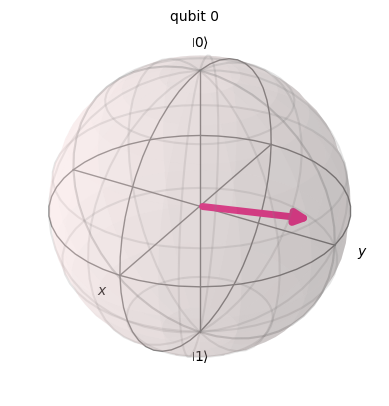

In [ ]:
# Simulamos el circuito con Aer para obtener el vector de estado
from qiskit_aer import Aer

# Usamos un simulador ideal
sim = Aer.get_backend('statevector_simulator')

job_sim = sim.run(qc)

# Obtenemos los resultados
result = job_sim.result()

# Obtenemos el vector de estado del circuito
estado = result.get_statevector()
muestra_estado(estado)

**Nota importante**: En un computador real no vamos a poder acceder al vector de estado, solo vamos a poder *medir* el estado.

In [ ]:
from qiskit_aer import Aer

# Obtener la lista de simuladores disponibles
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

<IPython.core.display.Latex object>

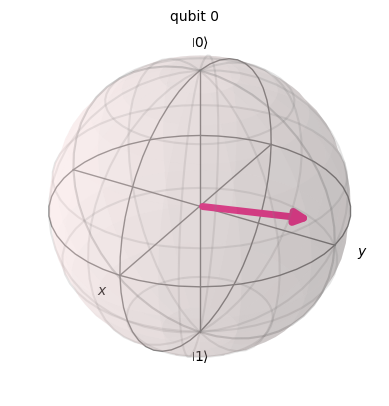

In [ ]:
# Otra forma de hacer lo mismo
from qiskit_aer import StatevectorSimulator

# Usamos un simulador ideal
sim = StatevectorSimulator()

result = sim.run(qc).result()

muestra_estado(result.get_statevector())

<IPython.core.display.Latex object>

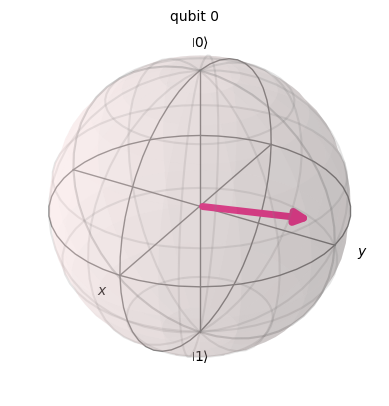

In [ ]:
# Y otra más
# Creamos un circuito cuántico de 1 cúbit
qc = QuantumCircuit(1)
# Inicializamos el cúbit al un estado aleatorio
qc.initialize(random_statevector(dims=2, seed=13)) # dims: dimensión del estado

# En este caso, tenemos que especificar que se salve el vector de estado
qc.save_statevector()

# Mostramos el circuito
qc.draw(output='mpl')

from qiskit_aer import AerSimulator

# Usamos un simulador por defecto
sim = AerSimulator(method='automatic')

# Podemos especificar un número de "shots" para hacer estimaciones estadísticas
result = sim.run(qc,shots=1024).result()

muestra_estado(result.get_statevector())

In [ ]:
AerSimulator().available_methods()

('automatic',
 'statevector',
 'density_matrix',
 'stabilizer',
 'matrix_product_state',
 'extended_stabilizer',
 'unitary',
 'superop')

In [ ]:
AerSimulator().available_devices()

('CPU',)

## Múltiples cúbits<a id="varios"></a>

El vector de estado de un sistema de $n$ cúbits se puede expresar como una combinación lineal de estados de la forma $|q_{n-1}\ldots q_1q_0\rangle$, con $q_j\in\{0,1\}$ es decir:

$$
|\psi\rangle = a_0|00\ldots00\rangle + a_1|00\ldots01\rangle + a_2|00\ldots10\rangle +\cdots + a_{2^n-1} |11\ldots11\rangle= \sum_{i=0}^{2^{n}-1} a_i |i\rangle
$$
donde $a_i \in \mathbb{C}$ y $\sum_{i=0}^{2^n-1}|a_i|^2 = 1$.

Esto corresponde a un vector de estado de un espacio de Hilbert de dimensión $2^n$, usando la base canónica $\{|00\ldots00\rangle, |00\ldots01\rangle, |00\ldots10\rangle,\ldots|11\ldots11\rangle\}$.


### Sistema de dos cúbits<a id="dos"></a>
La dimensión del espacio es 4 y los vectores de elementos de la base canónica $\{|00\rangle, |01\rangle, |10\rangle, |11\rangle\}$ se obtienen como el producto tensor de los elementos $\{|0\rangle, |1\rangle\}$:

$$
|00\rangle = |0\rangle\otimes|0\rangle = \begin{bmatrix}1\\0\end{bmatrix}\otimes \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}1\\0\\0\\0\end{bmatrix} $$
$$ |01\rangle = |0\rangle\otimes|1\rangle = \begin{bmatrix}1\\0\end{bmatrix}\otimes \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}0\\1\\0\\0\end{bmatrix}
$$

$$
|10\rangle = |1\rangle\otimes|0\rangle = \begin{bmatrix}0\\1\end{bmatrix}\otimes \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}0\\0\\1\\0\end{bmatrix} $$
$$
|11\rangle = |1\rangle\otimes|1\rangle = \begin{bmatrix}0\\1\end{bmatrix}\otimes \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}0\\0\\0\\1\end{bmatrix}
$$

Por lo tanto:

$$
|\psi\rangle = a_0\begin{bmatrix}1\\0\\0\\0\end{bmatrix} + a_1\begin{bmatrix}0\\1\\0\\0\end{bmatrix} + a_2\begin{bmatrix}0\\0\\1\\0\end{bmatrix} + a_3\begin{bmatrix}0\\0\\0\\1\end{bmatrix} = \begin{bmatrix}a_0\\a_1\\a_2\\a_3\end{bmatrix} =\\[30pt]
a_0|00\rangle+a_1|01\rangle+a_2|10\rangle+a_3|11\rangle = \\[10pt]
a_0|0\rangle+a_1|1\rangle+a_2|2\rangle+a_3|3\rangle
$$



### Combinación de estados
Sean los cúbits

$$
|\upsilon\rangle = a_0|0\rangle + a_1|1\rangle
$$

$$
|\phi\rangle = b_0|0\rangle + b_1|1\rangle
$$

El vector de estado del estado global formado por los dos cúbits es:

$$
|\psi\rangle = |\upsilon\phi\rangle = |\upsilon\rangle\otimes |\phi\rangle = (a_0|0\rangle + a_1|1\rangle)\otimes (b_0|0\rangle + b_1|1\rangle) = a_0b_0|00\rangle+a_0b_1|01\rangle+a_1b_0|10\rangle+a_1b_1|11\rangle
$$

<p><br></p>
    
----------------------------

**Ejemplo**

Obtener el vector de estado combinación de los cúbits $|+\rangle$ y $|-\rangle$

$$
|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle),\quad |-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle)
$$

$$
|+-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\otimes\tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = \tfrac{1}{2}(|00\rangle-|01\rangle+|10\rangle-|11\rangle)=
\begin{bmatrix}\tfrac{1}{2}\\-\tfrac{1}{2}\\\tfrac{1}{2}\\-\tfrac{1}{2}\end{bmatrix}
$$

----------------------------


<IPython.core.display.Latex object>

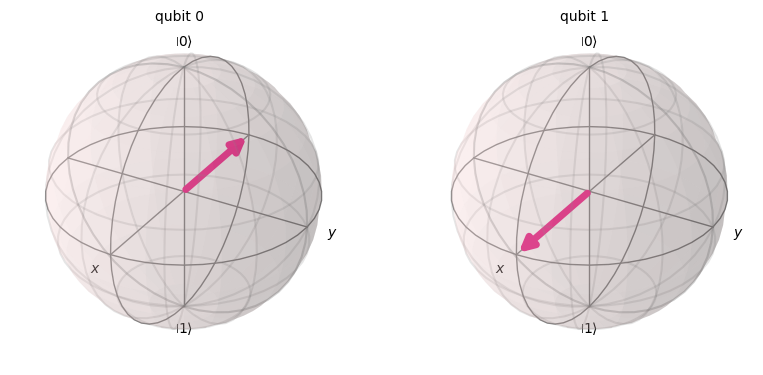

In [ ]:
# Formas de inicializar un estado multicúbit en Qiskit

# A partir de una lista
l = [1/2,-1/2,1/2,-1/2]
e = Statevector(l)
muestra_estado(e)

In [ ]:
# A partir de los estados |0> y |1>
e0 = Statevector.from_int(0, dims=2)  # dims indica la dimensión del estado
e1 = Statevector.from_int(1, dims=2)

# Producto tensor
e = ((e0^e0)-(e0^e1)+(e1^e0)-(e1^e1))/2
# Alternativa
#e = (e0.tensor(e0)-e0.tensor(e1)+e1.tensor(e0)-e1.tensor(e1))/2

e.draw('latex')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

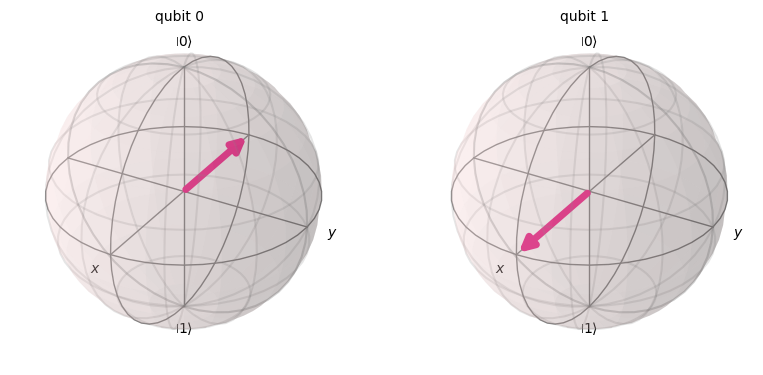

In [ ]:
# A partir del producto tensor de estados individuales
# Estados individuales
emas = Statevector([1/sqrt(2), 1/sqrt(2)])
emenos = Statevector([1/sqrt(2), -1/sqrt(2)])

emasmenos = emas^emenos
muestra_estado(emasmenos)

**Nota importante**: En un sistema multi-cúbit en Qiskit, el cúbit $q_0$ es el menos significativo (más a la derecha): $|q_{n-1}\ldots q_1q_0\rangle$. En otros sistemas y libros, el orden puede ser el inverso:  $|q_0q_1\ldots q_{n-1}\rangle$

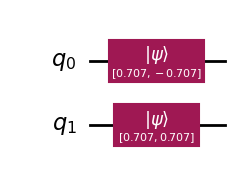

In [ ]:
# Crea el circuito cuántico y simulalo con Aer
from qiskit import QuantumCircuit
from qiskit_aer import StatevectorSimulator

# Creamos un circuito cuántico de 2 cúbits
qc = QuantumCircuit(2)

# Inicializamos el qbit 0 al estado |->
qc.initialize(emenos,0)
# Inicializamos el qbit 1 al estado |+>
qc.initialize(emas,1)
# Alternativa: qc.initialize(emasmenos)


# Mostramos el circuito
qc.draw('mpl')

<IPython.core.display.Latex object>

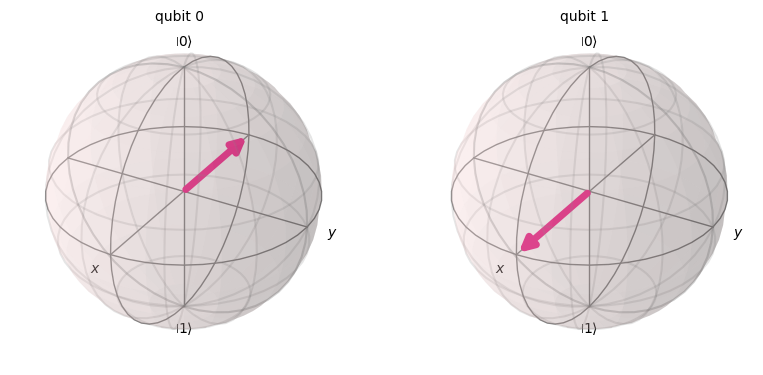

In [ ]:
# Utilizamos el simulador de vector de estado
sim = StatevectorSimulator()

# Ejecutamos una simulación
job_sim = sim.run(qc, shots=1)

# Obtenemos los resultados
result = job_sim.result()

# Obtenemos el vector de estado del circuito
estado = result.get_statevector()
muestra_estado(estado)

## Estados entrelazados (_entangled_)<a id="entrelazados"></a>
Propiedades:

- No se pueden expresar como el producto tensor de dos estados de dimensión inferior
- La medida de uno de los cúbits determina de forma inmediata el valor del segundo, aunque los cúbits estén separados por cualquier distancia:
  - [‘Spooky action at a distance’](https://en.wikipedia.org/wiki/Quantum_nonlocality)
  
----------------------------

**Ejemplo**

$$
|\beta\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

Este es uno de los denominados [estados de Bell](https://en.wikipedia.org/wiki/Bell_state).

----------------------------

Al no poder descomponer un estado entrelazado en el producto tensor de dos estados individuales, no es posible representarlos en una esfera de Bloch para cada cúbit.

<IPython.core.display.Latex object>

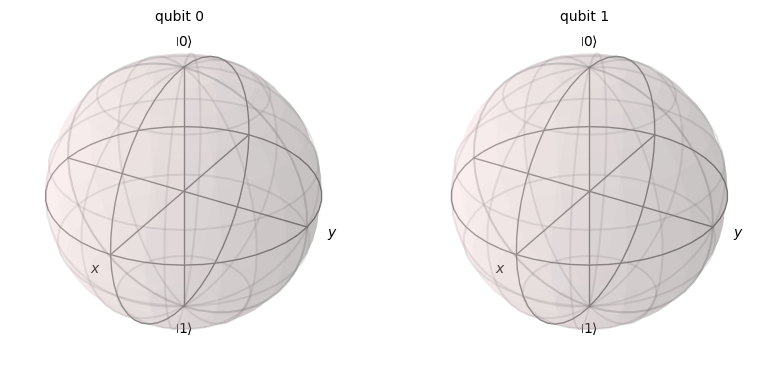

In [ ]:
e0 = Statevector.from_int(0, dims=2)  # dims indica la dimensión del estado
e1 = Statevector.from_int(1, dims=2)

ebell = ((e0^e0)+(e1^e1))/sqrt(2)
# Alternativa
#ebell = Statevector([1/sqrt(2), 0, 0, 1/sqrt(2)])

muestra_estado(ebell)

Una forma de visualizar el estado (en Qiskit) es usando una Q-esfera. Cada amplitud se representa por un circulo, cuyo diámetro es proporcional a la magnitud de la amplitud. La fase se representa mediante un código de colores.

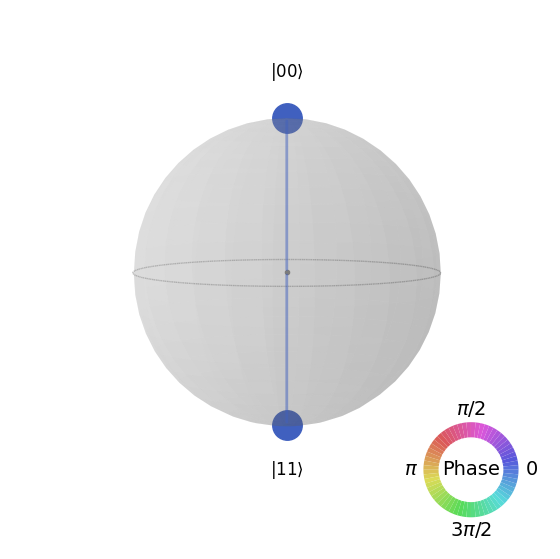

In [ ]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(ebell)

## Restricciones <a id="restricciones"></a>

A la hora de trabajar con cúbits hay que considerar tres restricciones

a. No clonado

b. Reversibilidad

c. Medida destructiva

### No clonado

No es posible obtener un duplicado de un estado cuántico (es decir, no es posible una puerta fan-out)

<center><img src="https://drive.google.com/uc?export=view&id=1FQCVX5DgqV0PdCTOl2UBYX_EYf0Mw--W" alt="No clonado" width="200"/></center>

<details><summary>Pulsa aquí ver una demostración del principio de no-clonado</summary>

Sean $|\psi\rangle$ y $|\phi\rangle$ dos estados cuánticos tales que $|\psi\rangle|\phi\rangle\neq 0$. Supongamos una transformación unitaria $U$ que clona un estado cuántico arbitrario en otro cúbit. $U$ podría definirse como:

$$U(|\psi\rangle|0\rangle) = |\psi\rangle|\psi\rangle$$
$$U(|\phi\rangle|0\rangle) = |\phi\rangle|\phi\rangle$$


Sea $|\varphi\rangle = \frac{1}{\sqrt{2}}(|\psi\rangle+|\phi\rangle)$. Aplicando $U$ a este estado combiando, y dada la linealidad de los operadores cuánticos:

$$
\begin{aligned}
U(|\varphi\rangle|0\rangle) & = \frac{1}{\sqrt{2}}U\left((|\psi\rangle+|\phi\rangle)|0\rangle\right) =  \frac{1}{\sqrt{2}}U\left(|\psi\rangle|0\rangle+|\phi\rangle|0\rangle\right)\\[10pt]
&= \frac{1}{\sqrt{2}}\left(U(|\psi\rangle|0\rangle)+U(|\phi\rangle|0\rangle)\right) =
\frac{1}{\sqrt{2}}\left(|\psi\rangle|\psi\rangle+|\phi\rangle|\phi\rangle\right)
\end{aligned}
$$

Pero por otro lado, dada la definición de $U$:

$$
\begin{aligned}
U(|\varphi\rangle|0\rangle) &= |\varphi\rangle|\varphi\rangle = \frac{1}{2}(|\psi\rangle+|\phi\rangle)(|\psi\rangle+|\phi\rangle)\\[10pt]
&= \frac{1}{2}(|\psi\rangle|\psi\rangle+|\psi\rangle|\phi\rangle+|\phi\rangle|\psi\rangle+|\phi\rangle|\phi\rangle) \neq \frac{1}{\sqrt{2}}\left(|\psi\rangle|\psi\rangle+|\phi\rangle|\phi\rangle\right)
\end{aligned}
$$
</details>



### Reversibilidad

Toda operación realizada sobre un estado cuántico (excepto la medición) tiene que ser reversible.

### Medida destructiva

La medida es destructiva: al medir un estado cuántico, el estado se pierde

<a name="medida"></a>
# **Medida del estado**

La medida del cúbit $|\psi\rangle = a_0|0\rangle + a_1|1\rangle$ devuelve un 0 con probabilidad $|a_0|^2$ y un 1 con probabilidad $|a_1|^2$. Estas probabilidades pueden obtenerse como:

$$
p(0) = |\langle 0|\psi\rangle|^2 = |\langle 0|a_0|0\rangle + \langle 0|a_1|1\rangle|^2 = |a_0|^2\\
p(1) = |\langle 1|\psi\rangle|^2 = |\langle 1|a_0|0\rangle + \langle 1|a_1|1\rangle|^2 = |a_1|^2
$$

La suma de ambas probabilidades es: $$p(0)+p(1) = |a_0|^2 + |a_1|^2 = 1$$

Si expresamos el estado usando la esfera de Bloch $|\psi\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle$ las probabilidades son:

$$p(0) = \left|\cos{\tfrac{\theta}{2}}\right|^2 = \cos^2{\tfrac{\theta}{2}}$$

$$p(1) = \left|e^{i\phi}\sin{\tfrac{\theta}{2}}\right|^2 = \sin^2{\tfrac{\theta}{2}}$$

verificandose que:

$$p(0) + p(1) = \cos^2{\tfrac{\theta}{2}} + \sin^2{\tfrac{\theta}{2}} = 1$$

### Estado tras la medida
El estado después de la medida viene determinado por lo que se haya medido:

- Medimos 0 $\Rightarrow |\psi^\prime\rangle = |0\rangle$
- Medimos 1 $\Rightarrow |\psi^\prime\rangle = |1\rangle$

El resultado de la medida es un valor clásico (0 o 1) y es probabilístico $\Rightarrow$ son necesarias varias medidas para obtener un resultado significativo.

----------------------------

**Ejemplo**

Dado el estado de 1 cúbit $|\psi\rangle = \tfrac{1}{\sqrt{3}}(|0\rangle + \sqrt{2}|1\rangle)$ las probabilidad de obtener un 1 al medir es

$$p(1) = \left|\frac{\sqrt{2}}{\sqrt{3}}\right|^2 = \frac{2}{3}$$
y el estado después de la medida es $|\psi'\rangle = |1\rangle$

----------------------------

#### Medida en Qiskit
Creamos un circuito cuántico con 1 cúbit en el estado $|\psi\rangle = \tfrac{1}{\sqrt{3}}(|0\rangle + \sqrt{2}|1\rangle)$ y lo simulamos con Aer

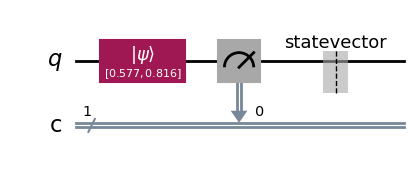

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import sqrt

# Creamos un circuito cuántico de 1 cúbit y 1 bit clásico para la medida
qc = QuantumCircuit(1,1)

# Inicializamos el cúbit al estado 1/√3(|0⟩+√2|1⟩)
qc.initialize(Statevector([1/sqrt(3), sqrt(2)/sqrt(3)]))

 # Le añadimos la medida
qc.measure(0,0)

# Indicamos que guarde el vector de estado (después de la medida)
qc.save_statevector()

# Mostramos el circuito
qc.draw('mpl')

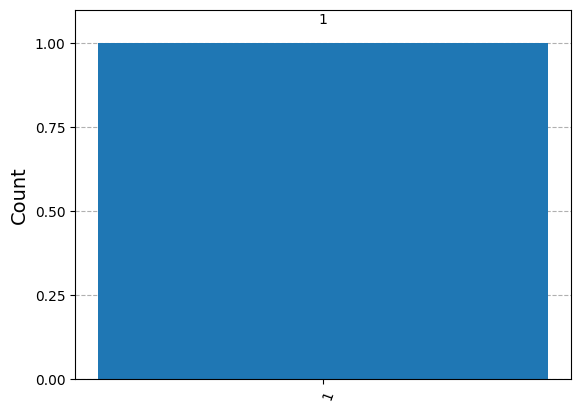

In [ ]:
# Utilizamos el simulador Aer por defecto
sim = AerSimulator()
# Hacemos una simulación y obtenemos los resultados
result = sim.run(qc, shots=1).result()

plot_histogram(result.get_counts())

<IPython.core.display.Latex object>

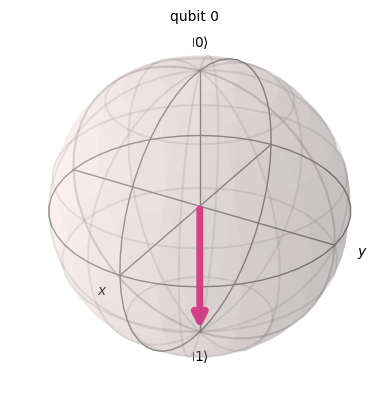

In [ ]:
# Obtenemos el estado después de la medida
estado_final = result.get_statevector()
muestra_estado(estado_final)

La medida es probabilística, por lo que normalmente se realizan múltiples medidas y se obtiene un histograma de las salidas.

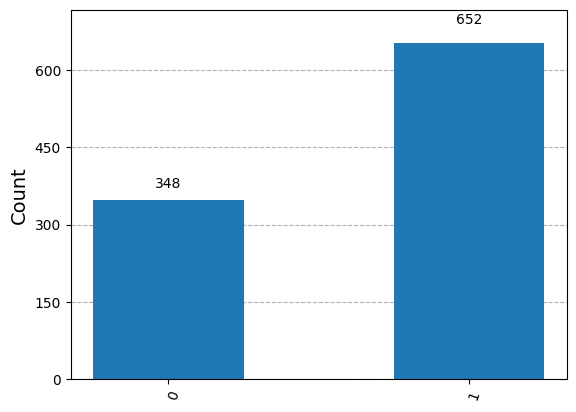

In [ ]:
# Hacemos 1000 simulaciones (shots)
result = sim.run(qc, shots=1000).result()

# Mostramos el histograma
plot_histogram(result.get_counts())

## Ejercicio: Medir el estado de 1 cúbit

Crear un circuito para un estado con un 80% de probabilidad de medir un 0 y 20% de medir un 1 y haz la medida.

In [ ]:
a0 = ...
a1 = ...
estado80_20 = ...

# Crea un circuito cuántico de 1 cúbit y 1 bit clásico para la medida
qc = ...

# Inicializamos el cúbit al estado 80_20
qc.initialize(estado80_20)

 # Le añadimos la medida
qc.measure(...)

# Utilizamos el simulador Aer
sim = AerSimulator()

# Hacemos 1024 simulaciones (shots) y obtenemos los resultados
result = sim.run(...).result()

# Mostramos el histograma
plot_histogram(result.get_counts())

## Medidas en sistemas multi-cúbit

Al medir el sistema $|\psi\rangle=\sum_{i=0}^{n-1} a_i |i\rangle$, la probabilidad de obtener el valor $i$, con $i=0,\ldots,n-1$, viene dada por la *Regla de Born*:

$$p(i) = |\langle i|\psi\rangle|^2 =  \langle\psi|i\rangle\langle i|\psi\rangle = |a_i|^2$$

El proceso de medida hace que el estado _colapse_, y el estado después de la medida es $|i\rangle$.

Lo que hacemos al medir es obtener la proyección del estado sobre el vector $|i\rangle$ de la base canónica.

$P_i = |i\rangle\langle i|$ se denomina operador de proyección, pues proyecta el vector de estado sobre el subespacio generado por el estado base $|i\rangle$.

Para 1 cúbit, la medida sobre la base canónica $\{|0\rangle, |1\rangle\}$ se denomina _medida Z_ porque equivale a proyectar el vector de estado sobre el eje Z de la esfera de Bloch. Es la medida más habitual (por no decir, la única), pero, en teoría, se podría medir un estado sobre cualquier base. Así tendríamos la _medida X_ usando la base $\{|+\rangle, |-\rangle\}$ y la _medida Y_ usando la base $\{|\!\!+i\rangle, |\!\!-i\rangle\}$.

----------------------------

**Ejemplo**

Dado el estado de 2 cúbits $|\psi\rangle=a_0|00\rangle+a_1|01\rangle+a_2|10\rangle+a_3|11\rangle$, la posibilidad de obtener 2 (10) al medir es:

$$
p(2) = \langle\psi|10\rangle\langle 10|\psi\rangle = a_2^*a_2 = |a_2|^2
$$

y el estado después de la medida es $|10\rangle$.

----------------------------

#### Medida de cúbits individuales en un sistema multi-cúbit
Si medimos cúbits individuales, la probabilidad se obtiene de forma similar. Por ejemplo, la probabilidad de obtener, en el estado del ejemplo anterior, un 1 cuando medimos el cúbit menos significativo es:

$$
p_{q0}(1) = p(1) + p(3) = |\langle 01|\psi\rangle|^2 + |\langle 11|\psi\rangle|^2 = |a_1|^2+|a_3|^2
$$

Y el estado despues de la medida es:

$$
|\psi'\rangle = \frac{a_1|01\rangle + a_3|11\rangle}{\sqrt{|a_1|^2+|a_3|^2}}
$$


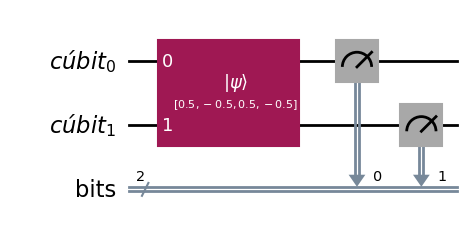

In [ ]:
# Creamos un circuito cuántico de 2 cúbits y 2 bits clásicos de medida
# Esta vez usaremos registros cuánticos y clásicos
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector

qr = QuantumRegister(size=2, name='cúbit')
cr = ClassicalRegister(size=2, name='bits')

qc = QuantumCircuit(qr,cr)

# Inicializamos el circuito al estado |+->
qc.initialize(Statevector([1/2, -1/2, 1/2, -1/2]))

# Le añadimos la medida (también se puede hacer con qc.measure_all())
for i in range(2):
    qc.measure(qr[i], cr[i])

# Mostramos el circuito
qc.draw('mpl')

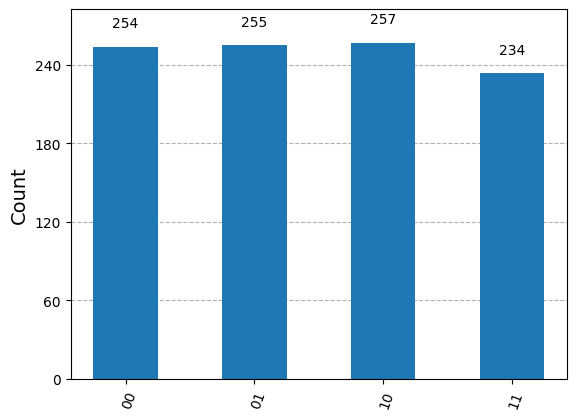

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Utilizamos el simulador Aer
sim = AerSimulator()

# Hacemos múltiples simulaciones (shots)
result = sim.run(qc, shots=1000).result()

# Mostramos el histograma
plot_histogram(result.get_counts())

Probamos ahora a medir solo el cúbit 1 y obtener el vector de estado del estado postarior a la medida.

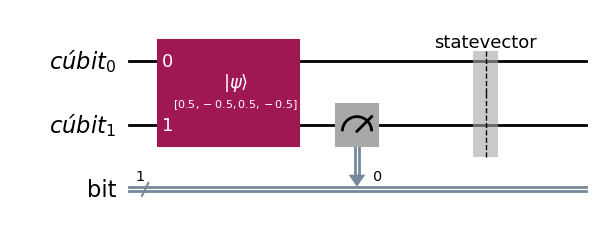

In [ ]:
# Repetimos para medir solo el cúbit 1
qr = QuantumRegister(size=2, name='cúbit')
cr = ClassicalRegister(size=1, name='bit')

qc = QuantumCircuit(qr,cr)

# Inicializamos el circuito al estado |+->
qc.initialize(Statevector([1/2, -1/2, 1/2, -1/2]))

# Le añadimos la medida (también se puede hacer con qc.measure(1,0))
qc.measure(qr[1], cr)

# Salvamos el vector de estado en este punto
qc.save_statevector()

# Mostramos el circuito
qc.draw('mpl')

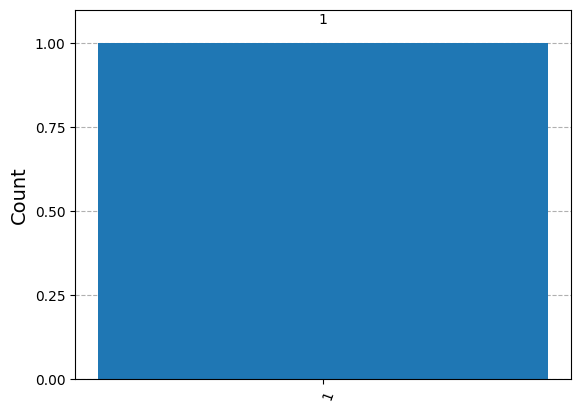

In [ ]:
# Hacemos una simulación
result = sim.run(qc, shots=1).result()

plot_histogram(result.get_counts())

<IPython.core.display.Latex object>

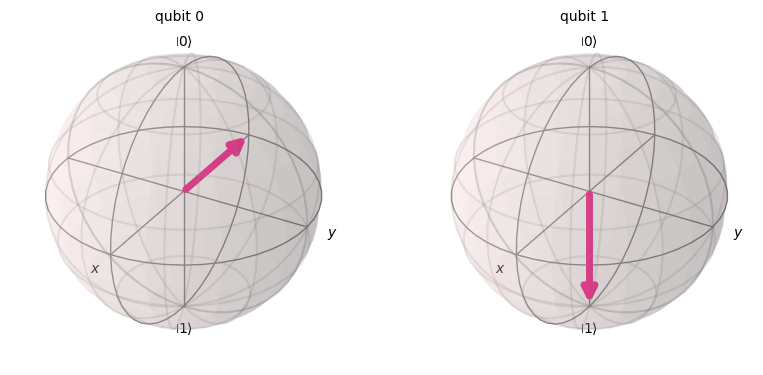

In [ ]:
# Obtenemos el estado después de la medida
estado_final = result.get_statevector()
muestra_estado(estado_final)

Este estado es

- Si medimos un 0: $\tfrac{1}{\sqrt{2}}(|00\rangle - |01\rangle) = |0\rangle\otimes|-\rangle$
- Si medimos un 1: $\tfrac{1}{\sqrt{2}}(|10\rangle - |11\rangle) = |1\rangle\otimes|-\rangle$

## Ejercicio: Medir un estado multi-cúbit

Crear un circuito de dos cúbits e inicializarlo al estado de Bell visto antes. Medir el cúbit $q_0$ y comprobar el estado después de la medida.

In [ ]:
# Estado entrelazado
ebell = Statevector([1/sqrt(2), 0, 0, 1/sqrt(2)])

# Crea un registro cuántico de 2 cúbits
qr = ...
# Crea un registro clásico de 1 bit
cr = ...

# Crea el circuito
qc = QuantumCircuit(...)

# Inicializamos el circuito al estado |+->
qc.initialize(...)

# Le añadimos la medida
qc.measure(...)

# Salvamos el vector de estado en este punto
qc.save_statevector()

# Mostramos el circuito
qc.draw('mpl')

In [ ]:
# Hacemos una simulación y obtenemos los resultados
result = ...

# Mostramos la salida
plot_histogram(result....)

In [ ]:
# Obtenemos el estado después de la medida
estado_final = Statevector()
muestra_estado(estado_final)



---



---



---



<a name="otros"></a>
# **Aspectos adicionales**

Otros aspectos de interés para profundizar en el tema:

1. Observables
1. Matrices de Pauli
1. Errores, matrices de densidad y estados mezcla

## Observables

Un _observable_ representa cualquier cantidad que se pueda medir en estado cuántico (energía, posición, momento, etc.). A cada observable le corresponde un operador hermitiano $M$ en el espacio de estados del sistema bajo observación.

Como el operador $M$ es hermitiano $\rightarrow$ es diagonalizable $\rightarrow$ según el teorema de descomposición espectral $M$ se puede escribir como:

$$M = \sum_i \lambda_i P_i = \sum_i \lambda_i |u_i\rangle\langle u_i|$$

donde $|u_i\rangle$ son los autovectores (o autoestados) de $M$. Además, se verifica que los autovalores $\lambda_i$ son reales, $\lambda_i \in \mathbb{R}$.

$P_i = |u_i\rangle\langle u_i|$ se denomina *operador de proyección*, pues proyecta el vector de estado sobre el subespacio generado por el autovector $|u_i\rangle$.

Cuando se mide un observable $M$ sobre un estado $|\psi\rangle$, las posibles salidas de la medida corresponden a los autovalores del observable $M$ y la probabilidad de obtener un resultado $\lambda_m$ es:
    
$$
p(\lambda_m) = |\langle u_m|\psi\rangle|^2 = \langle\psi|u_m\rangle\langle u_m|\psi\rangle = \langle\psi|P_m|\psi\rangle
$$

y el estado posterior a la medida queda como:

$$
|\psi'\rangle = \frac{P_m|\psi\rangle}{\sqrt{p(m)}} = \frac{|u_m\rangle\langle u_m|\psi\rangle}{|\langle u_m|\psi\rangle|}
$$

**Ejemplo**

Un ejemplo de observable es simplemente mirar si un cúbit $|\psi\rangle$ está o no en el estado $|1\rangle$. Ese observable tiene asociada la matriz:

$$|1\rangle\langle1| = \begin{bmatrix}0 & 0\\0 & 1\end{bmatrix}$$

Los autovalores esta matriz son son $0$ y $1$ y los autovectores correspondientes son $|0\rangle$ y $|1\rangle$.

Dado un estado $|\psi\rangle = a_0|0\rangle + a_1|1\rangle$ la probabilidad de obtener el autovalor $1$ es:

$$
p(\lambda=1) = |\langle 1|\psi\rangle|^2 = |a_0\langle 1|0\rangle + a_1\langle 1|1\rangle|^2 = |a_1|^2
$$

y el estado posterior a la medida es:

$$
|\psi'\rangle = \frac{|1\rangle\langle 1|\psi\rangle}{|\langle 1|\psi\rangle|} = \frac{a_1}{|a_1|}|1\rangle \equiv |1\rangle
$$
    
**Valor esperado de un observable**

El valor medio o valor esperado de un observable $M$ cuando observamos un estado $|\psi\rangle$ es:

$$
\langle M\rangle_{|\psi\rangle} = \sum_i \lambda_i p(\lambda_i) = \sum_i \lambda_i\langle\psi|P_i|\psi\rangle = \langle\psi|\left(\sum_i \lambda_i P_i\right)|\psi\rangle = \langle\psi|M|\psi\rangle
$$

y la desviación estándar asociada a las observaciones de $M$:

$$[\Delta(M)]^2 = \langle(M-\langle M\rangle)^2\rangle = \langle M^2\rangle - \langle M\rangle^2$$

Notar que el valor esperado de $M$ en uno de sus autoestados $|u_i\rangle$ es, precisamente, el autovalor asociado a ese autoestado:

$$
\langle M\rangle_{|u_i\rangle} = \langle u_i|M|u_i\rangle = \langle u_i|\lambda_i|u_i\rangle = \lambda_i
$$


**Ejemplo**
    
Un observable para un estado de 1 cúbit es medir si el vector de estado se encuentra sobre uno de los ejes de la esfera de Bloch. Por ejemplo, si medimos si se encuentra sobre el eje $Z$ la matriz asociada al observable es:

$$\sigma_z = \begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}$$

Los autovalores de $\sigma_z$ son $1$ y $-1$ y los autovectores correspondientes son $|0\rangle$ y $|1\rangle$.
    
Supongamos que tenemos el estado $|\psi\rangle=a_0|0\rangle+a_1|1\rangle$. El valor esperado del observable $\sigma_z$ en ese estado es:

$$\langle \sigma_z\rangle = \langle\psi|\sigma_z|\psi\rangle =
\begin{bmatrix}a_0^* & a_1^*\end{bmatrix}
\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}
\begin{bmatrix}a_0 \\ a_1\end{bmatrix} = |a_0|^2-|a_1|^2
$$

Así, por ejemplo, si $|\psi\rangle=|0\rangle$ el valor esperado será:

$$\langle \sigma_z\rangle = \langle0|\sigma_z|0\rangle = 1$$

Si $|\psi\rangle=|1\rangle$ será:

$$\langle \sigma_z\rangle = \langle1|\sigma_z|1\rangle = -1$$

Y si $|\psi\rangle=|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ será:

$$\langle \sigma_z\rangle = \langle+|\sigma_z|+\rangle =0$$

Los observables correspondientes a medir sobre el eje $X$ y el $Y$ son:

$$\sigma_x = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}$$

$$\sigma_y = \begin{bmatrix}0 & -i\\i & 0\end{bmatrix}$$

## Matrices de Pauli

Las matrices $\sigma_x$, $\sigma_y$ y $\sigma_z$, junto con la matriz identidad $\mathbb{I}$, se denominan **matrices de Pauli** (u operadores de Pauli) y son básicas dentro de la cuántica.

Si usamos la esfera de Bloch, dado un estado $|\psi\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle$, los valores esperados de estas matrices son:

$$
\begin{aligned}
\langle \sigma_x\rangle &= \langle\psi|\sigma_x|\psi\rangle =
\begin{bmatrix}\cos\tfrac{\theta}{2} & e^{-i\phi}\sin{\tfrac{\theta}{2}}\end{bmatrix}
\begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}
\begin{bmatrix}\cos\tfrac{\theta}{2} \\ e^{i\phi}\sin{\tfrac{\theta}{2}}\end{bmatrix} =
    (e^{i\phi}+e^{-i\phi})\cos^2\tfrac{\theta}{2}\sin^2\tfrac{\theta}{2} =
2\cos\phi\cos^2\tfrac{\theta}{2}\sin^2\tfrac{\theta}{2}=\cos\phi\sin\theta\\[10pt]
\langle \sigma_y\rangle &= \langle\psi|\sigma_y|\psi\rangle =
\begin{bmatrix}\cos\tfrac{\theta}{2} & e^{-i\phi}\sin{\tfrac{\theta}{2}}\end{bmatrix}
\begin{bmatrix}0 & -i\\i & 0\end{bmatrix}
\begin{bmatrix}\cos\tfrac{\theta}{2} \\ e^{i\phi}\sin{\tfrac{\theta}{2}}\end{bmatrix} =
    i(e^{-i\phi}-e^{i\phi})\cos^2\tfrac{\theta}{2}\sin^2\tfrac{\theta}{2} =
2\sin\phi\cos^2\tfrac{\theta}{2}\sin^2\tfrac{\theta}{2}=\sin\phi\sin\theta\\[10pt]
\langle \sigma_z\rangle &= \langle\psi|\sigma_z|\psi\rangle =
\begin{bmatrix}\cos\tfrac{\theta}{2} & e^{-i\phi}\sin{\tfrac{\theta}{2}}\end{bmatrix}
\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}
\begin{bmatrix}\cos\tfrac{\theta}{2} \\ e^{i\phi}\sin{\tfrac{\theta}{2}}\end{bmatrix} =
\cos^2\tfrac{\theta}{2}-\sin^2\tfrac{\theta}{2} =
\cos\theta
\end{aligned}
$$

para obtener estas ecuaciones hemos usado la fórmula del ángulo medio:

$$
\cos^2\tfrac{\theta}{2} = \tfrac{1}{2}(1+\cos\theta)\\
\sin^2\tfrac{\theta}{2} = \tfrac{1}{2}(1-\cos\theta)
$$

Podemos ver que estos valores corresponden con las coordenadas cartesianas de $|\phi\rangle$ en la esfera de Bloch:

$$
\vec{r} = \begin{pmatrix}
r_x\\r_y\\r_z
\end{pmatrix} =
\begin{pmatrix}
\sin\theta\cos\phi\\\sin\theta\sin\phi\\\cos\theta
\end{pmatrix}=
\begin{pmatrix}
\langle \sigma_x\rangle\\\langle \sigma_y\rangle\\\langle \sigma_z\rangle
\end{pmatrix}
$$

--------------------------------------------------

#### Observable general

Un operador hermitiano $M$ asociado a un observable puede expresarse como una combinación lineal de productos tensor de las matrices de Pauli $\{\mathbb{I}, \sigma_x, \sigma_y, \sigma_z\}$:

$$
M = \sum_i c_i P_i
$$

siendo $P_i$ un producto tensor de matrices de Pauli.

**Ejemplo**: Sea $M$ un observable de la forma:

$$
M = \frac{1}{2}\sigma_z\otimes I\otimes\sigma_x - 3 I\otimes \sigma_y\otimes\sigma_y + 2 \sigma_z\otimes \sigma_x\otimes\sigma_z
$$
Por tanto, se puede escribir:

$$
\langle M\rangle_{|\psi\rangle} = \langle\psi|M|\psi\rangle = \sum_i c_i \langle\psi|P_i|\psi\rangle =
\langle\psi|\left(\frac{1}{2}\sigma_z\otimes I\otimes\sigma_x - 3 I\otimes \sigma_y\otimes\sigma_y + 2 \sigma_z\otimes \sigma_x\otimes\sigma_z\right)|\psi\rangle = \\
\frac{1}{2}\langle\psi|\sigma_z\otimes I\otimes\sigma_x|\psi\rangle - 3\langle\psi|I\otimes \sigma_y\otimes\sigma_y|\psi\rangle +2\langle\psi|2 \sigma_z\otimes \sigma_x\otimes\sigma_z|\psi\rangle
 $$


## Errores, matrices de densidad y estados mezcla<a id="densidad"></a>

Diferentes fuentes de error producen fallos en la computación:

 - Errores en la preparación del estado y en la medida
 - Errores en las puertas
 - Errores en estadísticos debidos a un número finito de medidas
 - Errores debidos al ruido ambiental

Se necesitan técnicas de corrección de errores:

  - Para implementar 1 cúbit _lógico_ (sin error) se necesitan varios cúbits físicos

Los sistemas actuales, con pocos cúbits y con errores, se denominan NISQ (_Noisy intermediate-scale quantum_)

### Tiempos de decoherencia

El ruido puede hacer que con el tiempo el estado de un cúbit cambie

 - $T_1$ (tiempo de relajación): tiempo en que un estado $|1\rangle$ decae a $|0\rangle$
   - La probabilidad de que el cúbit siga a $|1\rangle$ tras un tiempo $t$ es $P(|1\rangle) = e^{-\frac{t}{T_1}}$
 - $T_2$ (tiempo de _dephasing_): tiempo en el que un estado $|+\rangle$ decae a un estado _mezcla_

Estos valores limitan el tiempo (y, por tanto, la complejidad) de un algoritmo en un computador cuántico

Los valores concretos dependen de la tecnología:

  - De decenas de $\mu s$ a milisegundos


### Matrices de densidad y estados mezcla

Los cúbits que venimos usando (y seguiremos usando) se dice que están en un estado "puro": se pueden expresar mediante un vector de estado.

Debido al ruido, el estado de los cúbits puede cambian a un estado indeseado, denominado estado "mezcla" (_mixed state_):

- Un estado mezcla es una combinación de estados puros con diferentes probabilidades para cada estado
- Son estados indeseables, pues se reduce la información que proporcionan

Una matriz de densidad permite expresar tanto los estados puros como los estados mezcla.

#### Propiedades de la matriz de densidad
Una matriz de densidad $\rho$ es una matriz cuadrada con las siguientes propiedades:

- Es hermitiana $\Rightarrow$ sus autovalores $\lambda_i \in \mathbb{R}$
- Su _traza_ (suma de los elementos de la diagonal o suma de los autovalores) es 1: $\mathrm{tr}(\rho) = \sum_i \lambda_i = 1$
- Es un operador positivo, es decir, para cualquier vector $|v\rangle$ se tiene que $\langle v|\rho|v\rangle \ge 0$ $\Rightarrow$ sus autovalores son todos $\lambda_i \ge 0$

Por lo tanto, tendremos que $0 \le \lambda_i \le 1, \forall i$

Dada esta propiedades, una matriz de densidad es diagonalizable y por el teorema de descomposición espectral podemos escribir:

$$
\rho = \sum_i \lambda_i|v_i\rangle\langle v_i|
$$
siendo $\lambda_i$ y $|v_i\rangle$ los autovalores y autovectores de $\rho$.

#### Estados puros y matriz de densidad

La matriz de densidad de un estado puro $|\psi\rangle$ se optiene como:

$$
\rho = |\psi\rangle\langle\psi|
$$

Así, para 1 cúbit, la matriz de densidad de un estado $|\psi\rangle = a_0|0\rangle + a_1|1\rangle$ será

$$
\rho = |\psi\rangle\langle\psi| =
\begin{bmatrix}
a_0 \\ a_1
\end{bmatrix}
\begin{bmatrix}
a^\ast_0 & a^\ast_1
\end{bmatrix} =
\begin{bmatrix}
a_0a^\ast_0 & a_0a^\ast_1\\
a_1a^\ast_0 & a_1a^\ast_1
\end{bmatrix} =
a_0a^\ast_0|0\rangle\langle 0|+
a_0a^\ast_1|0\rangle\langle 1|+
a_1a^\ast_0|1\rangle\langle 0|+
a_1a^\ast_1|1\rangle\langle 1|
$$

Se tiene entonces que $\mathrm{tr}(\rho) = |a_0|^2 + |a_1|^2 = 1$.

Se puede demostrar que la matriz de densidad de un estado puro se puede escribir, en función de las matrices de Pauli y de las coordenadas cartesianas del estado en la esfera de Bloch, como:

$$
\rho = \tfrac{1}{2}(\mathbb{I}+r_x\sigma_x+r_y\sigma_y+r_z\sigma_z) =
 \frac{1}{2}\begin{bmatrix}
1+r_z & r_x-ir_y\\
r_x+ir_y & 1-r_z
\end{bmatrix}
$$

donde:

$$
\vec{r} = \begin{pmatrix}
r_x\\r_y\\r_z
\end{pmatrix} =
\begin{pmatrix}
\sin\theta\cos\phi\\\sin\theta\sin\phi\\\cos\theta
\end{pmatrix}=
\begin{pmatrix}
\langle \sigma_x\rangle\\\langle \sigma_y\rangle\\\langle \sigma_z\rangle
\end{pmatrix}
$$

A partir de la ecuación anterior de $\rho$, es fácil verificar que podemos escribir $\vec{r}$ como:

$$
\vec{r} = \begin{pmatrix}
\mathrm{tr}(\sigma_x\rho)\\\mathrm{tr}(\sigma_y\rho)\\\mathrm{tr}(\sigma_z\rho)
\end{pmatrix}
$$

----------------------------

**Ejemplos**

- Matriz de densidad del estado $|0\rangle$:

$$
\rho = |0\rangle\langle0| =
\begin{bmatrix}
1 \\ 0
\end{bmatrix}
\begin{bmatrix}
1 & 0
\end{bmatrix}=
\begin{bmatrix}
1 & 0\\ 0 & 0
\end{bmatrix}
$$

- Matriz de densidad del estado $|-i\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle-i|1\rangle)$

$$
\rho = |\!-i\rangle\langle-i| =
\frac{1}{2}\begin{bmatrix}
1 \\ -i
\end{bmatrix}
\begin{bmatrix}
1 & i
\end{bmatrix}=
\frac{1}{2}\begin{bmatrix}
1 & i\\ -i & 1
\end{bmatrix} =
\frac{1}{2}(|0\rangle\langle0| +i |0\rangle\langle1| -i|1\rangle\langle0| + |1\rangle\langle1|)
$$

- Matriz de densidad del estado $|\!+-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\otimes \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = \tfrac{1}{2}(|00\rangle-|01\rangle+|01\rangle-|11\rangle)$

$$
\rho = |\!+-\rangle\langle+-| =
\frac{1}{4}\begin{bmatrix}
+1 \\ -1 \\ +1 \\ -1
\end{bmatrix}
\begin{bmatrix}
+1 & -1 & +1 & -1
\end{bmatrix}=
\frac{1}{4}\begin{bmatrix}
+1 & -1 & +1 & -1 \\
-1 & +1 & -1 & +1 \\
+1 & -1 & +1 & -1 \\
-1 & +1 & -1 & +1
\end{bmatrix}
$$

----------------------------

Todas estas matrices tienen un autovalor igual a 1 y el resto 0. Así que, además de verificarse que $\mathrm{tr}(\rho) = 1$ se cumple que:

$$
\mathrm{tr}(\rho^2) = \sum_i \lambda_i^2 = 1
$$

#### Estados mezcla

Los autovalores de las matrices de densidad de estados mezcla verifican que $\lambda_i \lt 1, \forall i$, por lo que, además de verificarse que $\mathrm{tr}(\rho) = 1$, se cumple que:

$$
\mathrm{tr}(\rho^2) = \sum_i \lambda_i^2 \lt 1
$$

La matriz de densidad de un estado mezcla tiene varios autovalores menores de 1.

En general, dado un conjunto de estados puros $\{|\psi_i\rangle\}$, la matriz de densidad de una mezcla de los mismos viene dada por:

$$
\rho \equiv \sum_i p_i |\psi_i\rangle\langle\psi_i|
$$

donde los valores $p_i$ corresponden a probabilidades clásicas, verificando que $0\leq p_i < 1$ y $\sum_i p_i = 1$.

----------------------------

**Ejemplo**

- Matriz de densidad de un estado mezcla de $|0\rangle$ y $|1\rangle$, con igual probabilidad:

$$
\rho = \frac{1}{2}|0\rangle\langle0| + \frac{1}{2}|1\rangle\langle1| = \frac{1}{2}\begin{bmatrix}
1 & 0\\ 0 & 1
\end{bmatrix} = \frac{\mathbb{I}}{2}
$$

Este estado se denomina _maximally mixed state_ y no proporciona ninguna información.

---------------------

En general, la matriz de densidad de un estado mezcla de $|0\rangle$ y $|1\rangle$ con probabilidad $0 < p < 1$ de estar en $|0\rangle$ es:

$$
\rho = p|0\rangle\langle0| + (1-p)|1\rangle\langle1| =
\begin{bmatrix}
p & 0\\ 0 & 1-p
\end{bmatrix}
$$

Si consideramos este estado como un vector en la esfera de Bloch, sus coordenadas cartesianas vendrán dadas por:

$$
\vec{r} = \begin{pmatrix}
\mathrm{tr}(\sigma_x\rho)\\\mathrm{tr}(\sigma_y\rho)\\\mathrm{tr}(\sigma_z\rho)
\end{pmatrix}
$$

Operando para $\rho$ tenemos:

$$
\begin{aligned}
\mathrm{tr}(\sigma_x\rho) &=
\mathrm{tr}\left(
\begin{bmatrix}
0 & 1\\ 1 & 0
\end{bmatrix}
\begin{bmatrix}
p & 0\\ 0 & 1-p
\end{bmatrix}
\right) = 0\\[5pt]
\mathrm{tr}(\sigma_y\rho) &=
\mathrm{tr}\left(
\begin{bmatrix}
0 & -i\\ i & 0
\end{bmatrix}
\begin{bmatrix}
p & 0\\ 0 & 1-p
\end{bmatrix}
\right) = 0\\[5pt]
\mathrm{tr}(\sigma_z\rho) &=
\mathrm{tr}\left(
\begin{bmatrix}
1 & 0\\ 0 & -1
\end{bmatrix}
\begin{bmatrix}
p & 0\\ 0 & 1-p
\end{bmatrix}
\right) =
\mathrm{tr}\left(
\begin{bmatrix}
p & 0\\ 0 & p-1
\end{bmatrix}
\right) =
2p-1\\
\end{aligned}
$$

Por tanto:

$$
\vec{r} = \begin{pmatrix}
0\\0\\2p-1
\end{pmatrix}
$$

Se trata de un vector sobre el eje Z y de longitud $r_z\in(-1,1)$:

<center><img src="https://drive.google.com/uc?export=view&id=1vGYdIxyPg4NpGKu7az7yzK2lWLyJgAF_" alt="Esfera de Bloch de un estado mezcla" width="300"/></center>


En general, los estados mezcla van a corresponder a vectores en el interior de la esfera de Bloch, con $|\vec{r}|<1$